# 1. Setup

## 1.1 Install Dependencies

In [31]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

SyntaxError: invalid syntax (3291526949.py, line 1)

## 1.2 Import dependencies(both standard and tensorflow)

In [25]:
#import dependencies
import cv2
import random
import os
import numpy as np
from matplotlib import pyplot as plt

In [27]:
#import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [28]:
#avoid out of memory errors by setting GPU memory consumption growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu[1], True)

In [29]:
len(gpus)

0

## 1.3 Setup folders 

In [4]:
#setup directories or paths
POS_PATH=os.path.join('data', 'positive')
NEG_PATH=os.path.join('data', 'negative')
ANC_PATH=os.path.join('data', 'anchor')

In [5]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

# 2. Collect the data for positive and anchors

## 2.1 Collect labelled dataset in the wild

In [5]:
#extraction of the labelled dataset in the wild
!tar -xf lfw.tgz

In [6]:
#move lfw images to the negative folder
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [7]:
#import uuid(universally unique identifiers) library to generate unique image names
import uuid

In [8]:
uuid.uuid1()

UUID('b31d8035-868c-11ed-b7e0-3c2c30e2c32d')

In [9]:
#estbalish a connection to a webcam
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #cut frame size to 250x250 pixels
    frame=frame[50:50+250, 230:230+250, :]
    
    #collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'): #show anchor images when you press a
        #create a unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out the anchor image
        cv2.imwrite(imgname, frame)
        
    #collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'): #show positive images when you press p
        #create a unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out the positive image
        cv2.imwrite(imgname, frame)
    
    #show image back to screen
    cv2.imshow('Image Collection', frame)
    
    #breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'): #closes when you press q
        break
#release the webcam and close the image frame
cap.release()
cv2.destroyAllWindows()

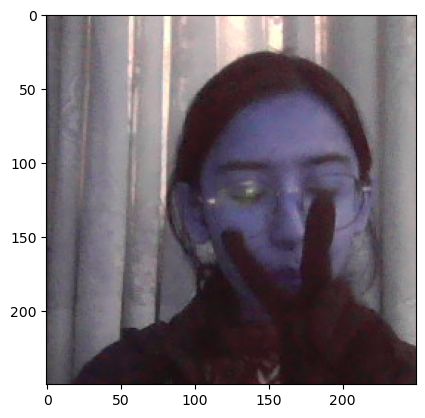

In [10]:
plt.imshow(frame)

In [11]:
frame.shape

(250, 250, 3)

In [12]:
frame[:250, :250, :].shape

(250, 250, 3)

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [13]:
anchor = tf.data.Dataset.list_files(ANC_PATH + "\*.jpg").take(300)
positive = tf.data.Dataset.list_files(POS_PATH + "\*.jpg").take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + "\*.jpg").take(300)

In [14]:
dir_test=anchor.as_numpy_iterator()

In [15]:
dir_test.next()

b'data\\anchor\\f0565705-837b-11ed-b497-3c2c30e2c32d.jpg'

## 3.2 Prepocessing - Scale and Resize

In [16]:
def preprocess(file_path):
    #read our image from file path
    byte_img = tf.io.read_file(file_path)
    
    #load the image using tensorflow decode
    img = tf.io.decode_jpeg(byte_img)
    
    #resizing image to be 100x100x3 
    img = tf.image.resize(img, (100,100))
    
    #scale image to be between 0 and 1
    img = img/255.0
    return img

In [17]:
img = preprocess('data\\anchor\\593f8640-8370-11ed-988f-3c2c30e2c32d.jpg')

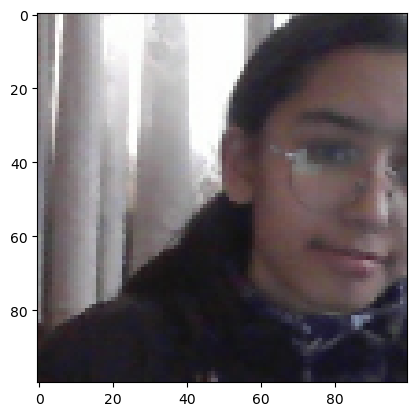

In [18]:
plt.imshow(img)

In [19]:
img.numpy().min()

0.05612745

In [20]:
img.numpy().max()

1.0

## 3.3 Create labelled dataset

In [21]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [22]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [23]:
# (anchor, positive)=>1,1,1,1,1
# (anchor, negative)=>0,0,0,0,0

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)                            

In [24]:
samples = data.as_numpy_iterator()

In [25]:
example =samples.next()

In [26]:
example

(b'data\\anchor\\5c88529b-8370-11ed-88cf-3c2c30e2c32d.jpg',
 b'data\\positive\\11318c01-837c-11ed-b856-3c2c30e2c32d.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [27]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [28]:
result = preprocess_twin(*example)

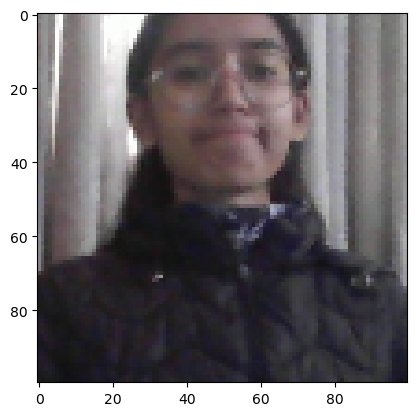

In [29]:
plt.imshow(result[0])

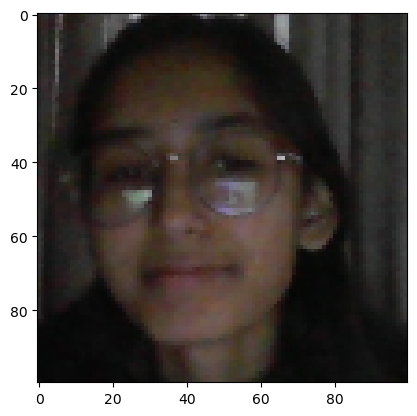

In [30]:
plt.imshow(result[1])

In [31]:
result[2]

1.0

In [32]:
#build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [33]:
data

<ShuffleDataset shapes: ((100, 100, None), (100, 100, None), ()), types: (tf.float32, tf.float32, tf.float32)>

In [34]:
samples = data.as_numpy_iterator()

In [35]:
len(samples.next())

3

In [36]:
samp = samples.next()

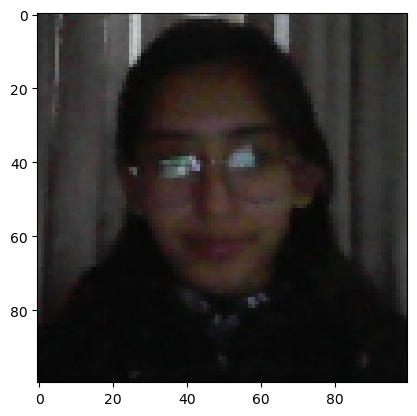

In [37]:
plt.imshow(samp[0])

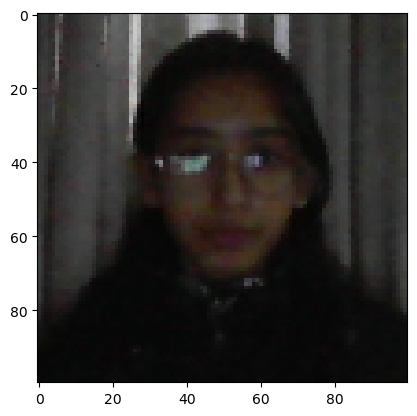

In [38]:
plt.imshow(samp[1])

In [39]:
samp[2]

1.0

In [40]:
#training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [41]:
round(len(data)*.7)

420

In [42]:
train_samples = train_data.as_numpy_iterator()

In [43]:
train_sample = train_samples.next()

In [44]:
len(train_sample)

3

In [45]:
len(train_sample[0])

16

In [46]:
#testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [47]:
inp = Input(shape=(100, 100, 3),  name = "Input_Image")

In [48]:
inp

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'Input_Image')>

In [49]:
c1 = Conv2D(64, (10,10), activation = 'relu')(inp)


In [50]:
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [51]:
m1 = MaxPooling2D(63, (2,2), padding = 'same')(c1)


In [52]:
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [53]:
c2 = Conv2D(128, (7,7), activation = 'relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding = 'same')(c2)

c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding = 'same')(c3)

c4 = Conv2D(256, (4,4), activation = 'relu')(m3) 
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [54]:
def make_embedding():
    inp = Input(shape=(100, 100, 3),  name = "Input_Image")
    
    #first block
    #implement the convolution layer
    c1 = Conv2D(64, (10,10), activation = 'relu')(inp)
    
    #implement the maxpool
    m1 = MaxPooling2D(64, (2,2), padding = 'same')(c1)
    
    #second block
    c2 = Conv2D(128, (7,7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding = 'same')(c2)
    
    #third block
    c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding = 'same')(c3)
    
    #fourth block - final embedding block
    c4 = Conv2D(256, (4,4), activation = 'relu')(m3) 
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [55]:
embedding = make_embedding()

In [56]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

## 4.2 Build Distance Layer

In [57]:
# tells us how similar the faces are 
# create L1 distance class
class L1Dist(Layer):
    
    #init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
    
    # magic happens here - anchor and positive/negative image are compared
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [58]:
l1= L1Dist()

## 4.3 Make Siamese Model

In [59]:
def make_siamese_model():
    
    # anchor image input
    input_image  = Input(name = 'input_img', shape=(100,100,3))
    
    # validation image input
    validation_image = Input(name = 'validation_img', shape=(100, 100, 3))
    
    # combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    #classification layer
    classifier = Dense(1, activation = 'sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [60]:
siamese_model = make_siamese_model()

In [61]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[0][0]     

# 5. Training

## 5.1 Setup Loss Function and Optimiser

In [62]:
#loss function
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [63]:
#adam optimizer of keras
opt = tf.keras.optimizers.Adam(1e-4)#0.001

## 5.2 Establish Checkpoints

In [64]:
#checkpoint function
checkpoint_dir = './training_checkpoints' #save our stuff
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Functions

In [65]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:
        #get anchor and positive/negative image
        X = batch[:2]
        
        # get label
        y = batch[2]
        
        #forward pass
        yhat = siamese_model(X, training=True)
        
        #calculate the loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
    
    #calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    #calculate  updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    return loss

## 5.4 Build Training Loop

In [66]:
def train(data, EPOCHS):
    #loop through the epochs
    
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch{}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        #loop through each batch
        for idx, batch in enumerate(data):
            #run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        #save checkpoints
        if epoch % 5 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the Model

In [67]:
EPOCHS = 25

In [ ]:
train(train_data, EPOCHS)


 Epoch1/20
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 517s 19s/step

 Epoch2/20
27/27 [==============================] - 516s 19s/step

 Epoch3/20
27/27 [==============================] - 512s 19s/step

 Epoch4/20
27/27 [==============================] - 507s 19s/step

 Epoch5/20
27/27 [==============================] - 2808s 107s/step

 Epoch6/20
27/27 [==============================] - 480s 18s/step

 Epoch7/20
27/27 [==============================] - 498s 18s/step

 Epoch8/20
27/27 [==============================] - 507s 19s/step

 Epoch9/20
27/27 [==============================] - 508s 19s/step

 Epoch10/20
27/27 [==============================] - 505s 19s/step

 Epoch11/20
24/27 [=========================>....] - ETA: 1:15

# 6. Testing the Model on Images

## 6.1 Import Metrics

In [ ]:
#import metrics calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make predictions

In [1]:
#get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

NameError: name 'test_data' is not defined

In [ ]:
y_true #labels of either 0 and 1

In [ ]:
#make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

In [ ]:
#post processing the results
#res=[]
#for prediction in y_hat:
    #if prediction >0.5:
     #   res.append(1)
    #else:
       # res.append(0)
[1 if prediction > 0.5 else 0 for prediction in y_hat]

In [ ]:
y_true

## 6.3 Calculate Metrics- Precision and Recall

In [ ]:
#create a metric object
m= Precision()

#calculating the recall value
m.update_state(y_true, y_hat)

#return recall result
m.result().numpy()

In [ ]:
#create a metric object
m= Recall()

#calculating the recall value
m.update_state(y_true, y_hat)

#return recall result
m.result().numpy()

## 6.4 Vizualize Results

In [ ]:
#set plot size
plt.figure(figsize=(10,8))

#set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

#set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

# 7. Save Model

In [ ]:
#save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
#reload model
model = tf.keras.models.load_model('siamesemodel.h5',
                                  custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
model.predict([test_input, test_val])

In [ ]:
model.summary()

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    
    #build results array
    results=[]
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img=preprocess(os.path.join('application_data', 'input_image','input_image.jpg'))
        validation_img=preprocess(os.path.join('application_data','verification_images',image))
        
        #make predictions
        result=model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
        
    #detection threshold: metric above 50% is considered positive
    detection = np.sum(np.array(results) > detection_threshold)
    
    #verification threshold: proportion of positive predictions/total positive samples
    
    verification = detection/len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [82]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    frame=frame[50:50+250, 230:230+250, :]
    
    cv2.imshow('Verification', frame)
    
    #verification trigger
    if cv2.waitKey(10) & 0xFF==ord('v'):
        #save out input image to input_image folder
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        
        #run verification
        results, verified = verify(model, 0.5, 0.5)
        print(verified)
        
        
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

False
False
